# Capítulo 15 - Machine Learning com Scikit-Learn

Problema de negócio: Usando dados históricos, é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Carregando os dados

In [3]:
df = pd.read_csv('dataset_cap15.csv')

In [4]:
df.shape

(500, 2)

In [5]:
df.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [6]:
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## Análise exploratória - Resumo estatístico

In [9]:
# Verificar se há valores ausentes
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [ ]:
# Correlação
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [11]:
# Resumo estatístico do dataset
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [12]:
# Resumo estatístico da variável preditora
df['horas_estudo_mes'].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

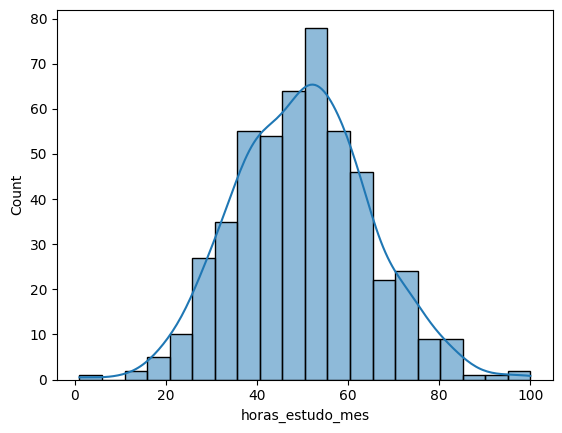

In [15]:
# Histograma da variável preditora
sns.histplot(data=df,x='horas_estudo_mes',kde=True)

## Preparação dos dados

In [ ]:
# Preparando variável de entrada x

# O algoritmo do scikit-learn recebe os dados em formato de matriz/array numpy
x = np.array(df['horas_estudo_mes'])

In [18]:
type(x)

numpy.ndarray

In [21]:
# Ajustando o shape de x
x = x.reshape(-1,1)

In [ ]:
# Preparando a variável-alvo
y = df['salario']

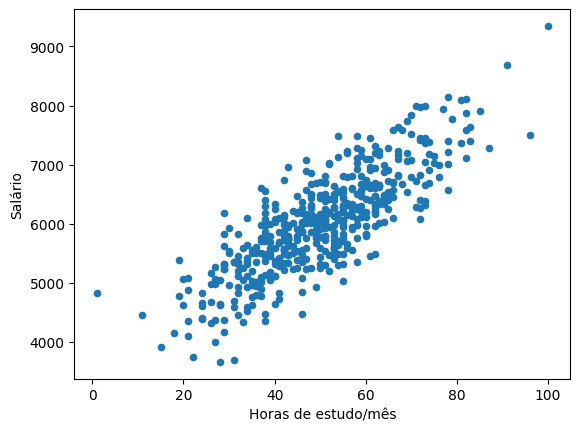

In [32]:
# Visualizando graficamente a relação entre as variáveis

df.plot(kind='scatter', x='horas_estudo_mes', y='salario', xlabel='Horas de estudo/mês', ylabel='Salário', legend='true')
plt.show()

In [33]:
# Dividindo variáveis em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size= 0.2, random_state = 42)

In [34]:
x_treino.shape

(400, 1)

In [35]:
x_teste.shape

(100, 1)

In [36]:
y_treino.shape

(400,)

In [37]:
y_teste.shape

(100,)

### Modelagem preditiva (Machine Learning)

In [41]:
# Criando o modelo
modelo = LinearRegression()

In [42]:
# Treinando o modelo
modelo.fit(x_treino, y_treino)

LinearRegression()

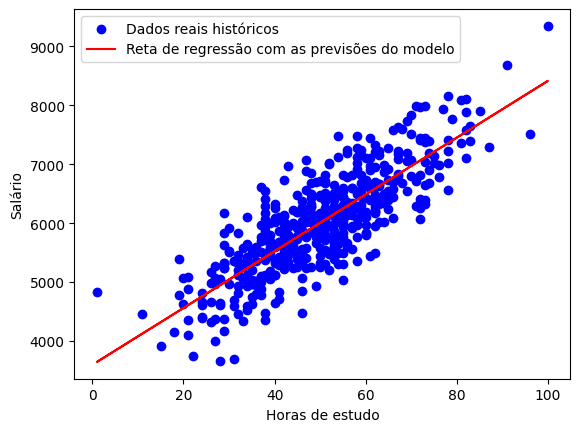

In [43]:
# Visualizando a linha reta de regressão linear (previsões) e os dados reais usados no treinamento
plt.scatter(x,y, color = 'blue', label='Dados reais históricos')
plt.plot(x, modelo.predict(x), color='red', label = 'Reta de regressão com as previsões do modelo')
plt.xlabel('Horas de estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()


In [52]:
# Avaliando o modelo com os dados de teste
score = modelo.score(x_teste,y_teste)
print(f'Coeficiente R²: {score:.2f}')

Coeficiente R²: 0.59


In [ ]:
# Intercepto - parâmetro w0 (ponto em que a linha de regressão intercepta o eixo y)
modelo.intercept_

3596.783724372753

In [ ]:
# Slope - parâmetro w1 (inclinação da reta)
modelo.coef_

array([48.18185277])

## Deploy do modelo

In [57]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]])

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de', horas_estudo_novo, 'horas por mês, seu salário pode ser igual a', salario_previsto)

Se você estudar cerca de [[48]] horas por mês, seu salário pode ser igual a [5909.5126574]


In [58]:
# Mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
# y_novo = w0 + w1 * x
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)

[[5909.5126574]]


In [59]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[65]])

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de', horas_estudo_novo, 'horas por mês, seu salário pode ser igual a', salario_previsto)

Se você estudar cerca de [[65]] horas por mês, seu salário pode ser igual a [6728.60415452]


In [60]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[73]])

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de', horas_estudo_novo, 'horas por mês, seu salário pode ser igual a', salario_previsto)

Se você estudar cerca de [[73]] horas por mês, seu salário pode ser igual a [7114.05897669]
